In [74]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [75]:
df = pd.read_csv("final_dataframe.csv")
df = df.iloc[:, 1:]
df = df.dropna()
df = df.drop(columns = ["bbl",'population'])
df.shape

(5330, 66)

In [76]:
df.describe()

,price,price_per_sqft,beds,bathrooms,area,postal_code,distance_ts,duration_ts,distance_db,duration_db,...,general_count,general_div,school_count,school_div,hospital_count,hospital_div,linknyc_count,restaurant_count,restaurant_div,park_count
count,5.330000e+03,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,...,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000
mean,1.434308e+06,936.353428,3.057411,2.346248,10930.512383,10764.070544,9.786323,42.526454,10.710600,53.244278,...,92.110319,0.503055,11.813508,0.557041,0.346904,0.034629,23.248593,261.374296,0.874744,23.248593
std,2.411553e+06,8882.798131,2.422158,1.993668,51782.103367,581.047052,19.997624,29.267362,20.038434,29.999787,...,86.086592,0.109661,9.892295,0.237885,0.770245,0.128699,16.144111,348.095738,0.099614,16.144111
min,3.900000e+04,0.441346,0.000000,0.000000,1.000000,10001.000000,0.100000,1.000000,0.100000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.590000e+05,361.145833,1.000000,1.000000,960.250000,10038.000000,4.600000,22.000000,5.200000,34.000000,...,27.000000,0.452326,4.000000,0.500000,0.000000,0.000000,11.000000,47.000000,0.865000,11.000000
50%,7.990000e+05,551.617647,3.000000,2.000000,1500.000000,11103.000000,9.300000,41.000000,9.800000,50.000000,...,69.000000,0.497798,9.000000,0.640000,0.000000,0.000000,20.000000,118.000000,0.896293,20.000000
75%,1.400000e+06,996.020242,4.000000,3.000000,2446.750000,11249.000000,13.200000,58.000000,15.300000,72.000000,...,120.000000,0.583385,18.000000,0.716049,0.000000,0.000000,30.000000,290.000000,0.916475,30.000000
max,6.380000e+07,625000.000000,41.000000,76.000000,667517.000000,11694.000000,999.000000,999.000000,999.000000,999.000000,...,426.000000,0.666481,52.000000,0.859504,5.000000,0.666667,92.000000,1996.000000,0.948246,92.000000


In [77]:
df.corr()

,price,price_per_sqft,beds,bathrooms,area,postal_code,distance_ts,duration_ts,distance_db,duration_db,...,general_count,general_div,school_count,school_div,hospital_count,hospital_div,linknyc_count,restaurant_count,restaurant_div,park_count
price,1.000000,0.050208,0.178557,0.360440,-0.041523,-0.232317,-0.087869,-0.236327,-0.085418,-0.223598,...,0.358091,0.232296,0.170986,0.092764,0.025047,0.003464,0.183483,0.364138,0.025638,0.183483
price_per_sqft,0.050208,1.000000,-0.020313,-0.000289,-0.019136,-0.047284,-0.016907,-0.043503,-0.011809,-0.032661,...,0.055050,0.047136,0.026224,0.013657,-0.000424,-0.000267,0.018243,0.050463,0.001197,0.018243
beds,0.178557,-0.020313,1.000000,0.664619,-0.117032,0.202528,0.056710,0.173556,0.029295,0.113761,...,-0.210291,-0.186116,-0.048211,-0.046104,-0.005447,-0.020770,-0.097935,-0.247501,-0.019635,-0.097935
bathrooms,0.360440,-0.000289,0.664619,1.000000,-0.085466,0.056860,0.019068,0.060247,0.002684,0.029582,...,-0.051615,-0.071853,-0.020693,-0.033568,-0.004120,-0.002971,-0.044565,-0.058595,-0.031308,-0.044565
area,-0.041523,-0.019136,-0.117032,-0.085466,1.000000,-0.011556,-0.032182,-0.080946,-0.012502,-0.034338,...,0.100113,0.115695,-0.019709,0.019464,-0.007266,-0.011086,0.025980,0.056409,0.045081,0.025980
postal_code,-0.232317,-0.047284,0.202528,0.056860,-0.011556,1.000000,0.128481,0.345113,0.056577,0.149837,...,-0.588906,-0.207209,-0.439481,-0.125240,-0.112446,-0.141163,-0.373692,-0.544693,-0.054768,-0.373692
distance_ts,-0.087869,-0.016907,0.056710,0.019068,-0.032182,0.128481,1.000000,0.804501,0.975024,0.751398,...,-0.237104,-0.229565,-0.167200,-0.156146,-0.070690,-0.044372,-0.144796,-0.202881,-0.155387,-0.144796
duration_ts,-0.236327,-0.043503,0.173556,0.060247,-0.080946,0.345113,0.804501,1.000000,0.741382,0.825120,...,-0.593754,-0.484311,-0.426461,-0.375109,-0.161210,-0.103948,-0.378308,-0.523638,-0.247930,-0.378308
distance_db,-0.085418,-0.011809,0.029295,0.002684,-0.012502,0.056577,0.975024,0.741382,1.000000,0.799426,...,-0.186753,-0.199978,-0.147487,-0.140130,-0.075049,-0.035722,-0.112979,-0.169273,-0.139370,-0.112979
duration_db,-0.223598,-0.032661,0.113761,0.029582,-0.034338,0.149837,0.751398,0.825120,0.799426,1.000000,...,-0.500049,-0.448759,-0.409161,-0.388307,-0.183052,-0.092240,-0.331355,-0.457482,-0.233704,-0.331355


/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


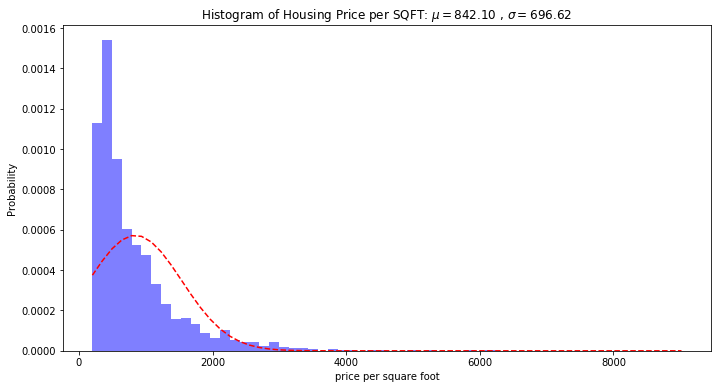

In [78]:
df = df[df['price_per_sqft'] > 200]
df = df[df['price_per_sqft'] < 10000]
df = df[df['distance_ts'] < 100]
df = df[df['duration_ts'] < 300]
df = df[df['distance_db'] < 100]
df = df[df['duration_db'] < 300]
df = df[df['distance_mn'] < 100]
df = df[df['duration_mn'] < 300]

mu = df['price_per_sqft'].mean()
sigma = np.std(df['price_per_sqft'])
x = df['price_per_sqft']


num_bins = 60
# the histogram of the data
f, ax = plt.subplots(1, figsize=(12, 6))
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('price per square foot')
plt.ylabel('Probability')
plt.title(r'Histogram of Housing Price per SQFT: $\mu={:.2f}$ , $\sigma={:.2f}$'.format(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


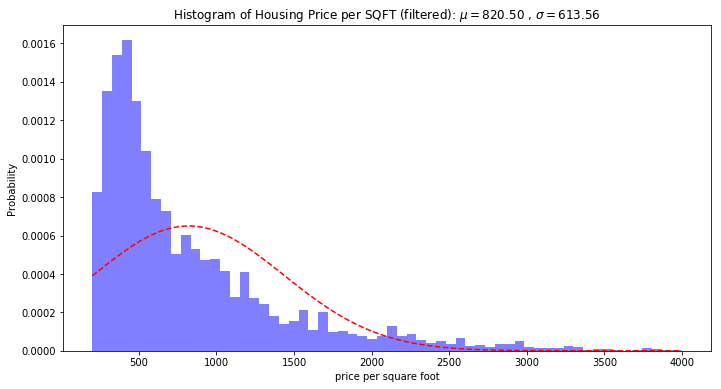

In [79]:
df = df[df['price_per_sqft'] < 4000]
df = df[df['yearbuilt'] > 1500]
df = df[df['pop_num'] > 0]

df['pop_mig_div_ind'] = df['pop_mig_div_ind'].astype(float)

mu = df['price_per_sqft'].mean()
sigma = np.std(df['price_per_sqft'])
x = df['price_per_sqft']


num_bins = 60
# the histogram of the data
f, ax = plt.subplots(1, figsize=(12, 6))
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('price per square foot')
plt.ylabel('Probability')
plt.title(r'Histogram of Housing Price per SQFT (filtered): $\mu={:.2f}$ , $\sigma={:.2f}$'.format(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

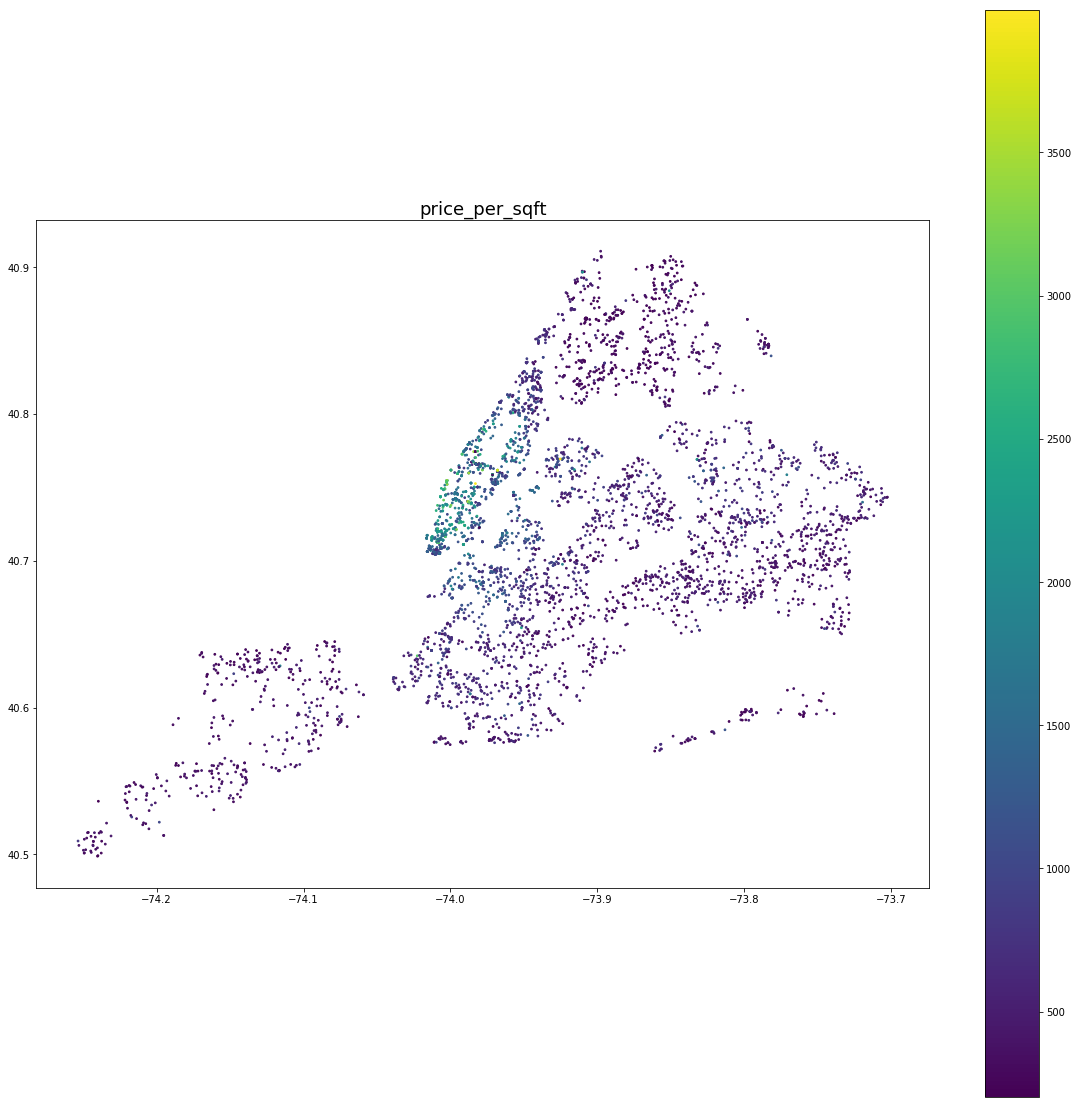

In [80]:
map_zillow = df[['price_per_sqft','lon','lat']]
map_zillow_gdf = gpd.GeoDataFrame(
    map_zillow, geometry=gpd.points_from_xy(map_zillow.lon, map_zillow.lat))


f, ax = plt.subplots(1, figsize=(20, 20))
ax.set_title('price_per_sqft', fontsize=18)
map_zillow_gdf.plot(ax=ax, column='price_per_sqft', legend=True, markersize = 3)

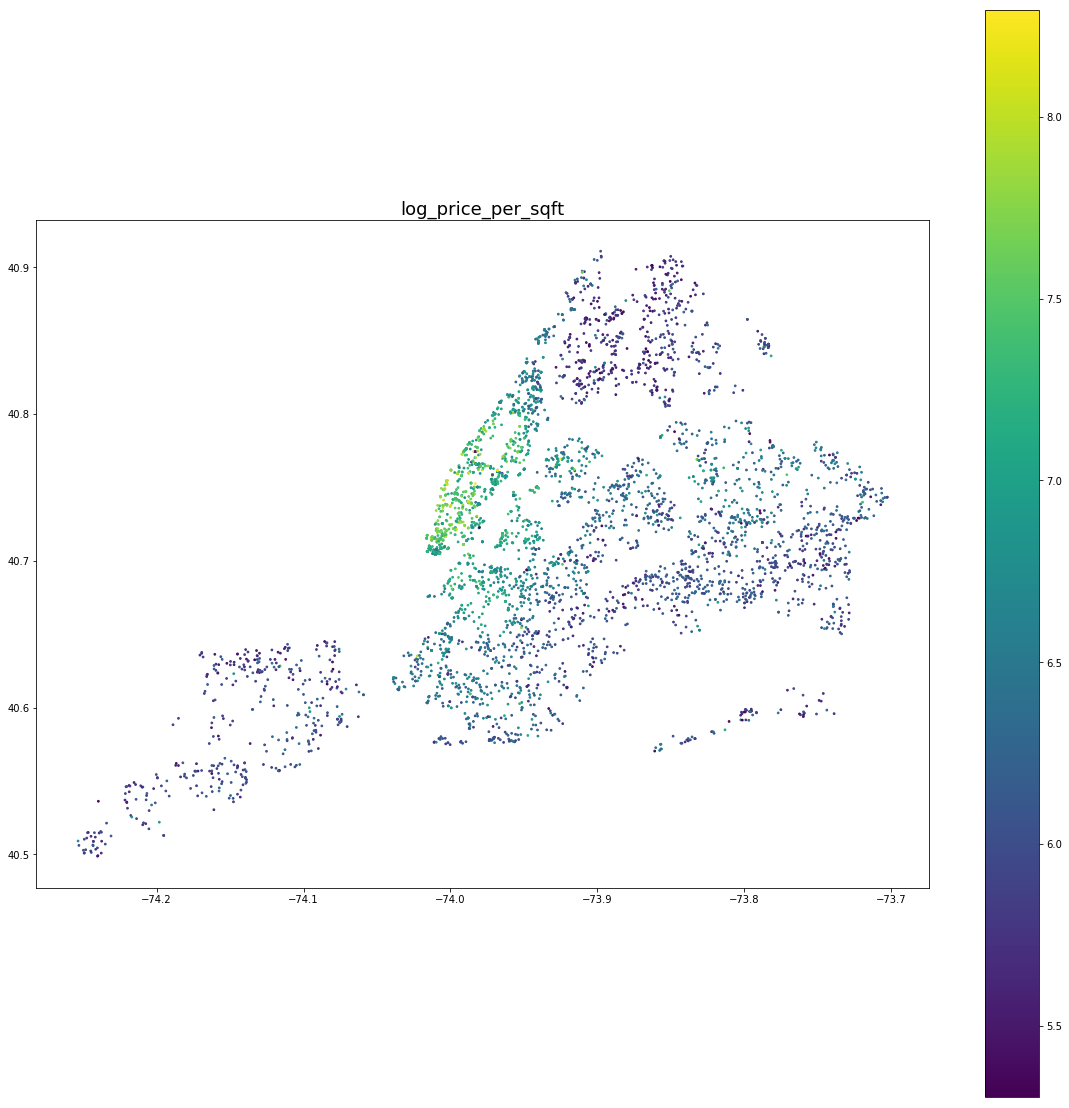

In [81]:
map_zillow = df[['price_per_sqft','lon','lat']]
map_zillow_gdf = gpd.GeoDataFrame(
    map_zillow, geometry=gpd.points_from_xy(map_zillow.lon, map_zillow.lat))


f, ax = plt.subplots(1, figsize=(20, 20))
map_zillow_gdf['price_per_sqft'] = np.log(map_zillow_gdf['price_per_sqft'])
ax.set_title('log_price_per_sqft', fontsize=18)
map_zillow_gdf.plot(ax=ax, column='price_per_sqft', legend=True, markersize = 3)

In [82]:
df['distance_to_ctr_avg'] = (df['distance_ts']+df['distance_db']+df['distance_mn'])/3
df['duration_to_ctr_avg'] = (df['duration_ts']+df['duration_db']+df['duration_mn'])/3
df = df.drop(columns = ['duration_ts', 'duration_db', 'duration_mn', 'distance_ts', 'distance_db', 'distance_mn'])


In [83]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_features = df[['beds', 'bathrooms', 'area', 'unitsres', 'unitstotal', 'residfar', 'yearbuilt']]

for n_clusters in range(2,7): #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = km.fit_predict(cluster_features)
    #report average Silhouette score
    silhouette_avg = silhouette_score(cluster_features, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.638606305883
For n_clusters =3, the average silhouette_score is :0.614544734258
For n_clusters =4, the average silhouette_score is :0.572416689495
For n_clusters =5, the average silhouette_score is :0.505174026413
For n_clusters =6, the average silhouette_score is :0.492038488152


/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


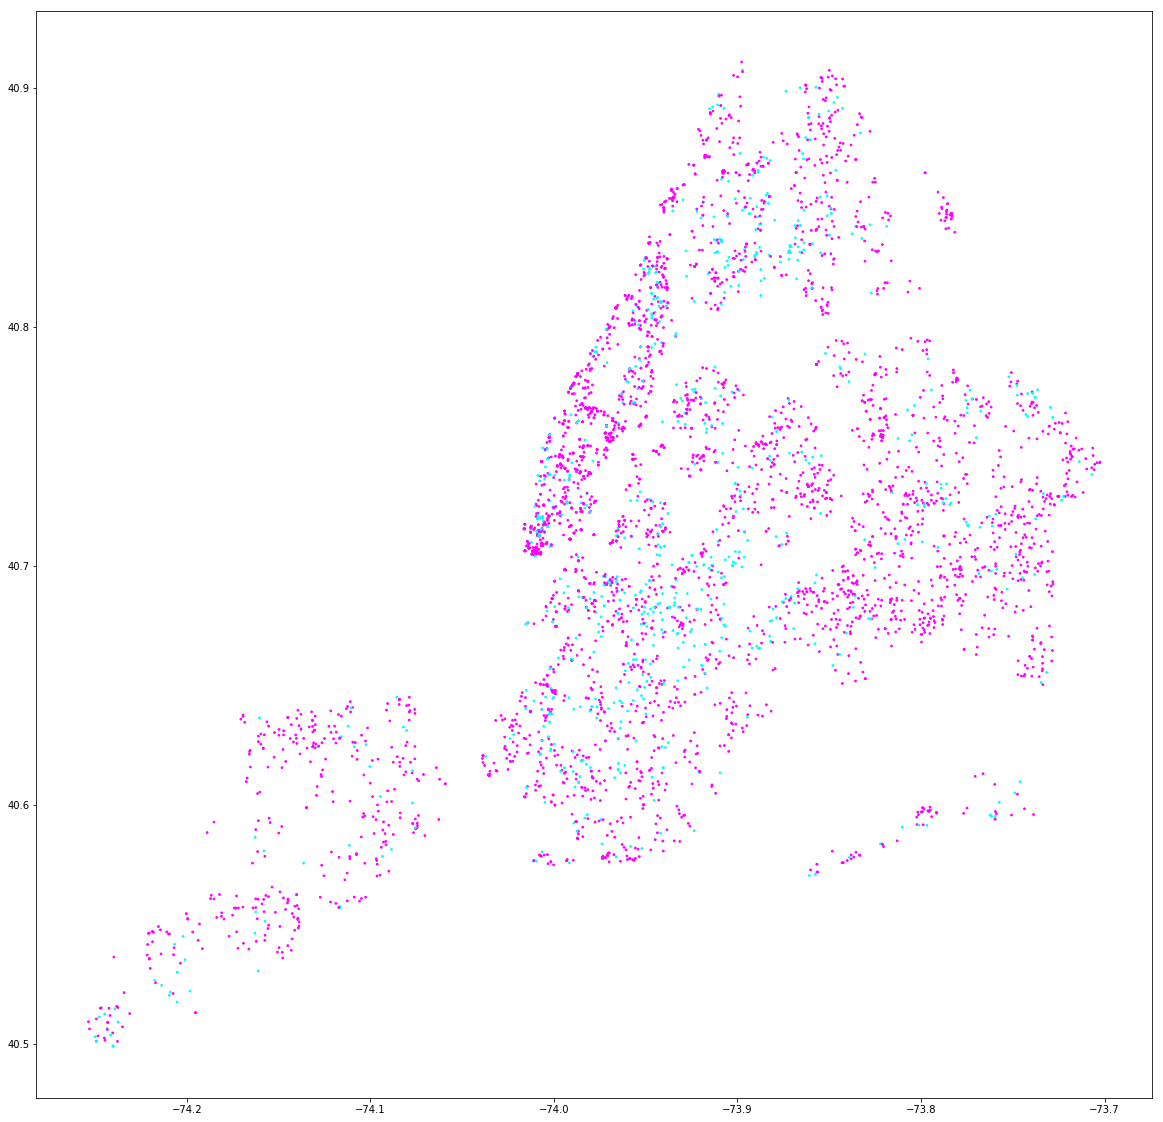

In [84]:
km=KMeans(random_state=1,n_clusters=2)
res=km.fit(cluster_features) #train the model
cluster_labels=res.labels_

cluster_map = df[['lon', 'lat']]
cluster_features['cluster_labels'] = cluster_labels

#cluster_map.plot(column='cluster_labels', legend=True, markersize = 3)
plt.figure(figsize = (20,20))
plt.scatter(cluster_map.lon,cluster_map.lat,c=cluster_labels,cmap=plt.cm.cool, s = 3)


In [85]:
cluster_1 = cluster_features[cluster_features['cluster_labels'] == 1]
cluster_1.describe()

,beds,bathrooms,area,unitsres,unitstotal,residfar,yearbuilt,cluster_labels
count,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.0
mean,2.638095,2.061153,1334.034085,104.882707,110.035088,3.171484,1954.939098,1.0
std,1.720317,1.213546,563.833718,251.887891,258.446686,3.281014,37.149641,0.0
min,0.000000,0.000000,225.000000,0.000000,0.000000,0.000000,1836.000000,1.0
25%,1.000000,1.000000,860.000000,1.000000,2.000000,0.500000,1925.000000,1.0
50%,2.000000,2.000000,1250.000000,10.000000,12.000000,2.000000,1950.000000,1.0
75%,3.000000,3.000000,1744.000000,118.000000,127.000000,4.000000,1989.000000,1.0
max,12.000000,21.000000,2626.000000,3857.000000,3986.000000,10.000000,2019.000000,1.0


In [86]:
cluster_0 = cluster_features[cluster_features['cluster_labels'] == 0]
cluster_0.describe()

,beds,bathrooms,area,unitsres,unitstotal,residfar,yearbuilt,cluster_labels
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.0
mean,5.775336,4.194750,3934.840049,13.796093,15.566545,2.598950,1940.199023,0.0
std,3.564060,3.662352,2400.947105,45.641649,50.092325,2.629647,38.369306,0.0
min,0.000000,0.000000,2632.000000,0.000000,0.000000,0.000000,1880.000000,0.0
25%,4.000000,3.000000,2982.000000,2.000000,2.000000,0.750000,1910.000000,0.0
50%,5.000000,4.000000,3301.000000,3.000000,3.000000,2.000000,1930.000000,0.0
75%,7.000000,5.000000,4079.000000,4.000000,5.000000,3.440000,1965.000000,0.0
max,41.000000,76.000000,32000.000000,478.000000,617.000000,10.000000,2019.000000,0.0


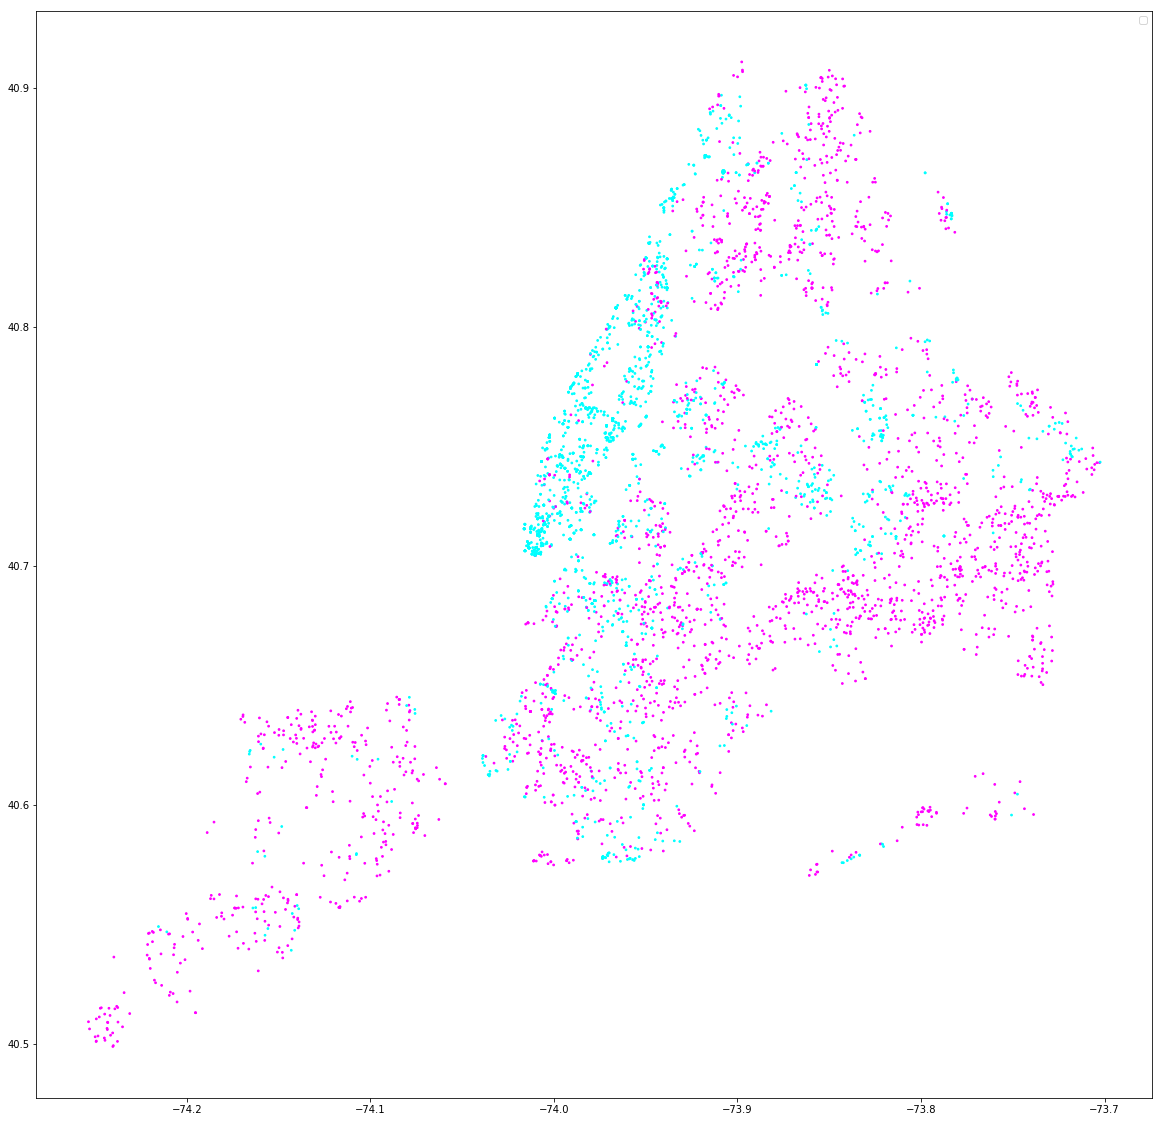

In [87]:
cluster_features = cluster_features.iloc[:,0:7]
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.

res1=GaussianMixture(n_components=2,random_state=324).fit(cluster_features)
L2=res1.predict(cluster_features)
cluster_features['cluster_labels_gm'] = L2

plt.figure(figsize = (20,20))
plt.legend('L2')
plt.scatter(cluster_map.lon,cluster_map.lat,c=L2,cmap=plt.cm.cool, s = 3)

In [88]:
cluster_1 = cluster_features[cluster_features['cluster_labels_gm'] == 1]
cluster_1.describe()

,beds,bathrooms,area,unitsres,unitstotal,residfar,yearbuilt,cluster_labels_gm
count,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.0
mean,4.463328,3.035883,2320.542192,1.966483,2.039826,1.216443,1939.344637,1.0
std,2.625215,2.482224,1743.242904,1.728762,1.872986,1.043606,31.379693,0.0
min,0.000000,0.000000,350.000000,0.000000,0.000000,0.000000,1865.000000,1.0
25%,3.000000,2.000000,1420.000000,1.000000,1.000000,0.500000,1920.000000,1.0
50%,4.000000,3.000000,1960.000000,2.000000,2.000000,0.750000,1930.000000,1.0
75%,6.000000,4.000000,2750.000000,2.000000,2.000000,2.000000,1955.000000,1.0
max,41.000000,76.000000,32000.000000,39.000000,39.000000,10.000000,2019.000000,1.0


In [89]:
cluster_0 = cluster_features[cluster_features['cluster_labels_gm'] == 0]
cluster_0.describe()

,beds,bathrooms,area,unitsres,unitstotal,residfar,yearbuilt,cluster_labels_gm
count,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.0
mean,1.732072,1.742411,1170.494941,186.886934,196.487462,5.146441,1967.026837,0.0
std,1.043050,1.009404,753.800848,310.778863,317.638008,3.482038,38.924773,0.0
min,0.000000,0.000000,225.000000,0.000000,0.000000,0.000000,1836.000000,0.0
25%,1.000000,1.000000,729.000000,36.000000,43.000000,2.430000,1930.000000,0.0
50%,2.000000,1.000000,950.000000,98.000000,106.000000,4.000000,1963.000000,0.0
75%,2.000000,2.000000,1311.000000,202.000000,218.000000,10.000000,2006.000000,0.0
max,7.000000,10.000000,9000.000000,3857.000000,3986.000000,10.000000,2019.000000,0.0


In [90]:
def Regularization_fit_alpha(model,X_train,y_train,X_valid,y_valid,alphas,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #aplhas: a list of aplha values to try
    #Graph: plot the graph of R^2 values for different alpha

    R_2_OS=[] #out of sample R2's
    
    #initialize the model to use for each given alpha
    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a, normalize = True)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a, normalize = True)
        model_label='Lasso'
    
    best_R2 = -1
    best_alpha = alphas[0]
    best_coefs = []
    
    for a in alphas: #for all alphas to try
        lm = RM(a) #assign the model
        lm.fit(X_train,y_train)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        R_2_OS_=r2_score(y_valid,y_predict)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2: #if current OS R2 is the best - update the best solution
            best_R2 = R_2_OS_
            best_alpha = a
            best_coefs = lm.coef_
    
    if Graph==True: #visualization of the performance depending on alpha
        plt.title('OS-R-squared for different Alpha')
        if logl: #log-scale
            plt.xlabel('ln(Alpha)')
            l=np.log(alphas)
            bl=np.log(best_alpha)
        else:
            plt.xlabel('Alpha')
            l=alphas
            bl=best_alpha
        plt.ylim((-0.1,1))
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return [best_alpha,best_R2,best_coefs]

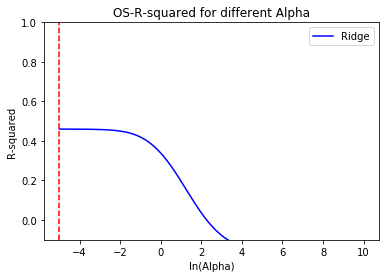

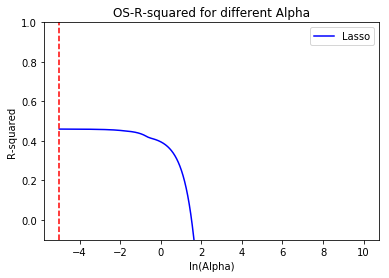

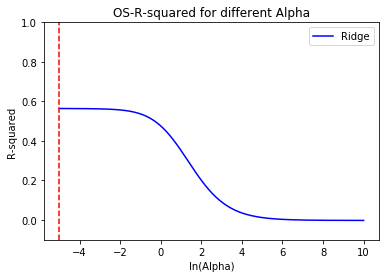

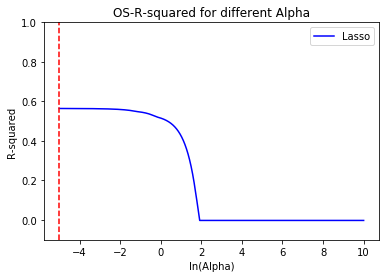

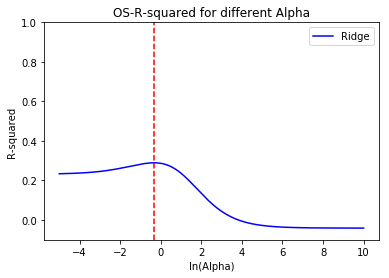

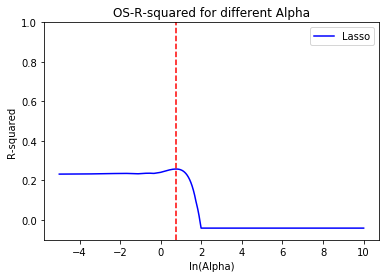

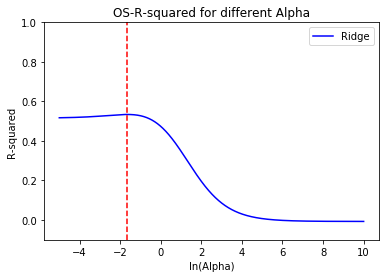

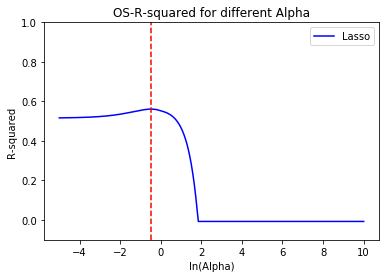

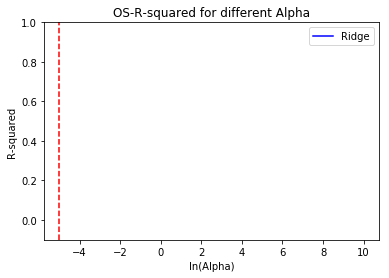

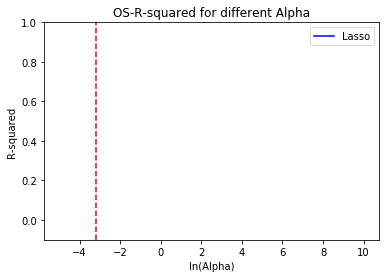

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(df)
IS = []
OS = []
Ridge_best = []
Lasso_best = []

for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index,:], df.iloc[test_index, :]
    lm = smf.ols(formula = 'price_per_sqft ~ beds+bathrooms+numfloors+unitsres+residfar+yearbuilt', data = df_train).fit()
    IS.append(lm.rsquared)
    OS.append(r2_score(df_test.price_per_sqft,lm.predict(df_test)))
    dataTrain = df_train[['price_per_sqft', 'beds', 'bathrooms','numfloors','unitsres', 'residfar','yearbuilt']]
    dataTest = df_test[['price_per_sqft', 'beds', 'bathrooms','numfloors','unitsres', 'residfar','yearbuilt']]

    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Ridge_best.append(best_R2)
    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Lasso_best.append(best_R2)

In [92]:
print(IS)
print(OS)

print(Ridge_best)
print(Lasso_best)

[0.5202898760717947, 0.5193291659488652, 0.5626290032293377, 0.519358278993725, 0.5085509486249221]
[0.4603213803402666, 0.5645495368235469, 0.2320321224768802, 0.5156218766479695, -0.7066267532530333]
[0.4601365678267535, 0.5643142236778609, 0.2895158914243039, 0.534030927212608, -0.7094056101550732]
[0.4601052816144795, 0.5643596719360557, 0.2581164169546084, 0.5611733350098824, -0.7054015736428001]


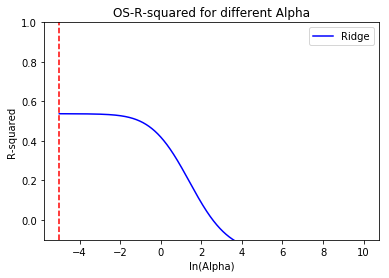

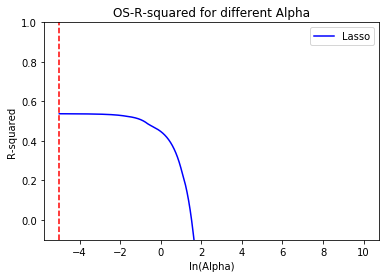

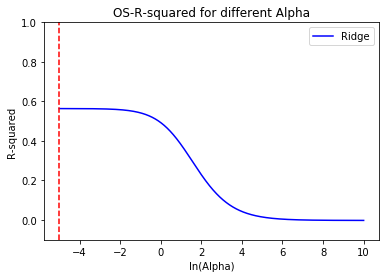

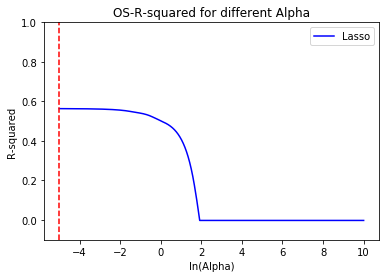

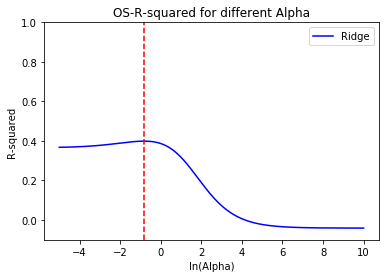

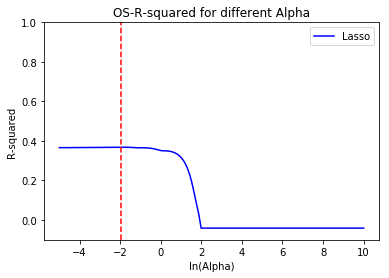

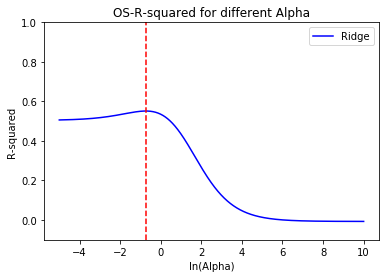

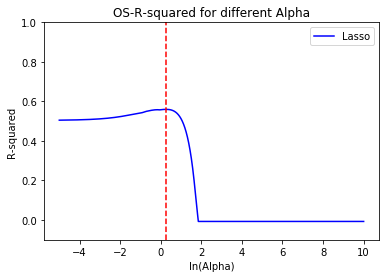

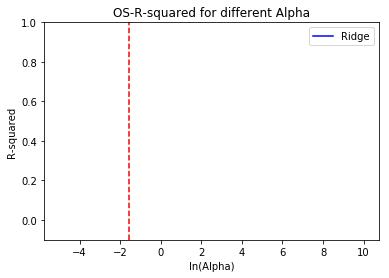

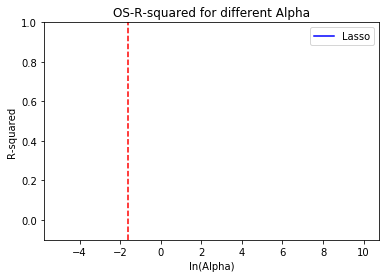

In [93]:
#distance was excluded due to high p-value
IS_1 = []
OS_1 = []
Ridge_best_1 = []
Lasso_best_1 = []

for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index,:], df.iloc[test_index, :]
    lm1 = smf.ols(formula = 'price_per_sqft ~ beds+bathrooms+numfloors+unitsres+residfar+yearbuilt+duration_to_ctr_avg', data = df_train).fit()
    IS_1.append(lm1.rsquared)
    OS_1.append(r2_score(df_test.price_per_sqft,lm1.predict(df_test)))
    dataTrain = df_train[['price_per_sqft', 'beds', 'bathrooms','numfloors','unitsres', 'residfar','yearbuilt', 'duration_to_ctr_avg']]
    dataTest = df_test[['price_per_sqft', 'beds', 'bathrooms','numfloors','unitsres', 'residfar','yearbuilt','duration_to_ctr_avg']]

    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Ridge_best_1.append(best_R2)
    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Lasso_best_1.append(best_R2)

In [94]:
print(IS_1)
print(OS_1)

print(Ridge_best_1)
print(Lasso_best_1)

[0.5518668843956374, 0.5830250240778485, 0.6070789379202075, 0.5889639687439188, 0.5722129536488044]
[0.5379888083270667, 0.5639171217060619, 0.36579526501794635, 0.5040753636339422, -0.9368326406234531]
[0.5377824808075355, 0.5638274678132489, 0.39920535149760716, 0.5515114924224584, -0.8632333720344993]
[0.5377045217412905, 0.5635925763798308, 0.3686395122985717, 0.5598377772692363, -0.9074186966024256]


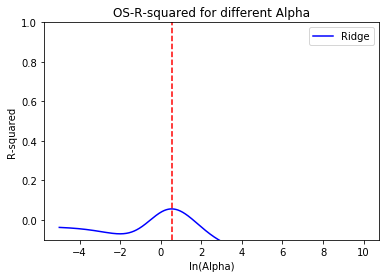

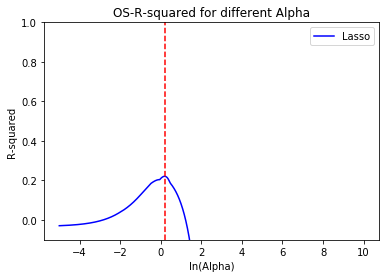

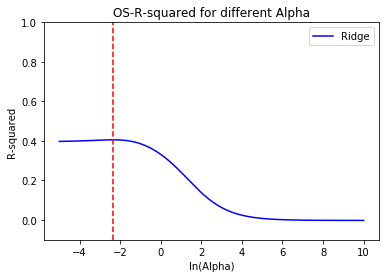

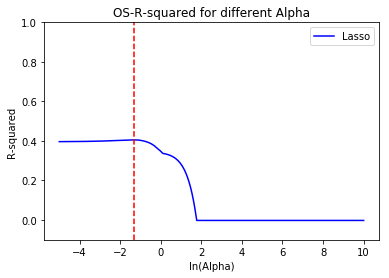

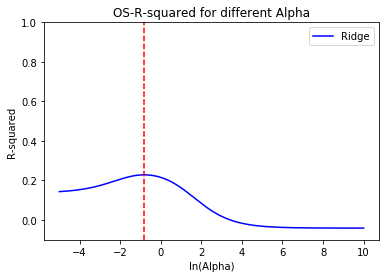

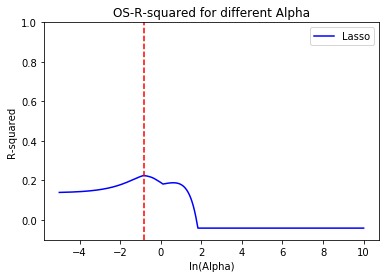

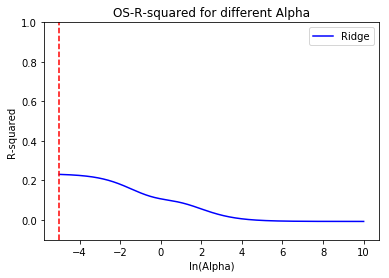

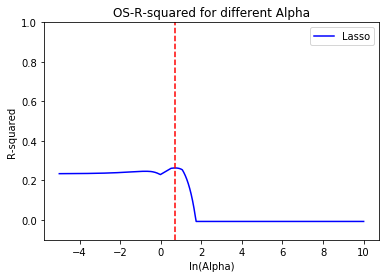

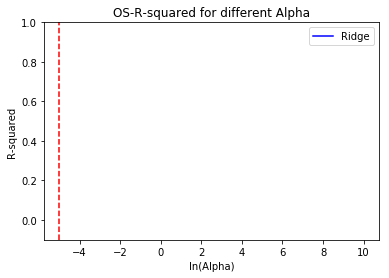

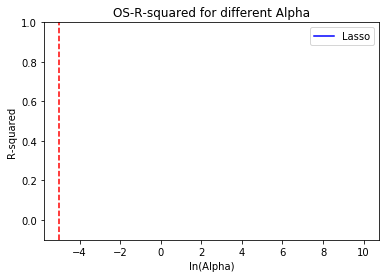

In [95]:

IS_2 = []
OS_2 = []
Ridge_best_2 = []
Lasso_best_2 = []

for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index,:], df.iloc[test_index, :]
    lm2 = smf.ols(formula = 'price_per_sqft ~ pop_num+pop_race_white_pct+pop_foreign_pct+pop_pov_pct+hh_inc_med+crime_all_rt', data = df_train).fit()
    IS_2.append(lm2.rsquared)
    OS_2.append(r2_score(df_test.price_per_sqft,lm2.predict(df_test)))
    
    dataTrain = df_train[['price_per_sqft','pop_num', 'pop_race_white_pct', 'pop_foreign_pct','pop_pov_pct', 'hh_inc_med', 'crime_all_rt']]
    dataTest = df_test[['price_per_sqft','pop_num', 'pop_race_white_pct', 'pop_foreign_pct','pop_pov_pct','hh_inc_med', 'crime_all_rt']]

    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Ridge_best_2.append(best_R2)
    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Lasso_best_2.append(best_R2)

In [96]:
print(IS_2)
print(OS_2)

print(Ridge_best_2)
print(Lasso_best_2)

[0.3923751009279186, 0.4119552653492322, 0.4390246176159277, 0.4379541786539102, 0.3916345503447327]
[-0.032779591640990535, 0.39610866297293257, 0.13738055096339608, 0.23418955334789304, -1.6291406095285814]
[0.0563413307204067, 0.4057775738637417, 0.22866391293836863, 0.23094805270390484, -1]
[0.22132458209398953, 0.40527465386920547, 0.2252402080339213, 0.2634154967525921, -1]


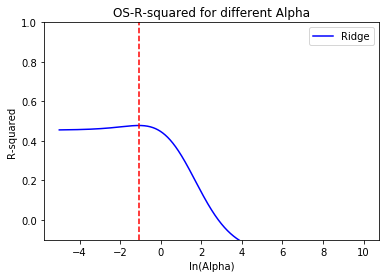

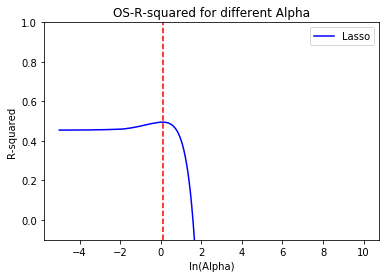

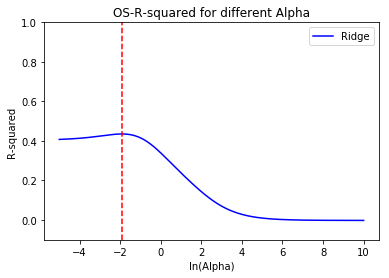

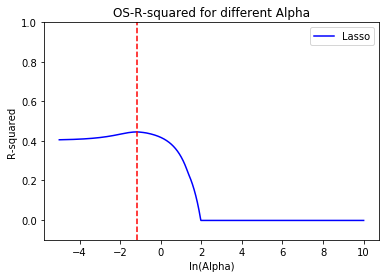

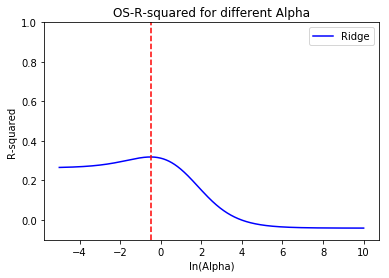

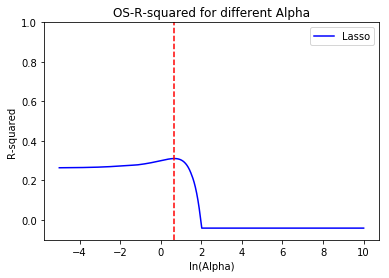

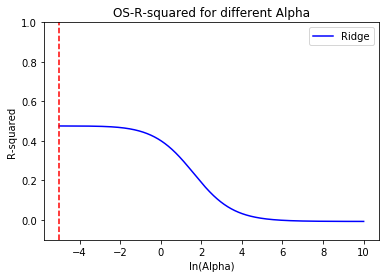

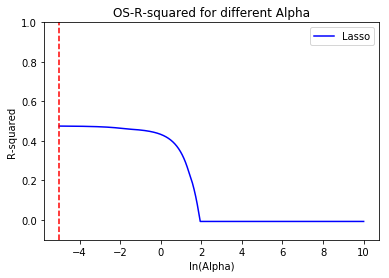

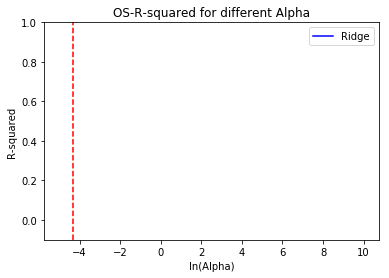

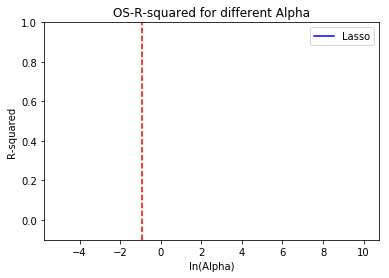

In [97]:

IS_3 = []
OS_3 = []
Ridge_best_3 = []
Lasso_best_3 = []

for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index,:], df.iloc[test_index, :]
    lm3 = smf.ols(formula = 'price_per_sqft ~ noise_count + cb_count + general_count + school_count + linknyc_count' , data = df_train).fit()
    IS_3.append(lm3.rsquared)
    OS_3.append(r2_score(df_test.price_per_sqft,lm3.predict(df_test)))
    
    dataTrain = df_train[['price_per_sqft', 'noise_count', 'cb_count', 'general_count', 'school_count', 'linknyc_count']]
    dataTest = df_test[['price_per_sqft', 'noise_count', 'cb_count', 'general_count', 'school_count', 'linknyc_count']]

    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Ridge_best_3.append(best_R2)
    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Lasso_best_3.append(best_R2)



In [107]:
print(IS_3)
print(OS_3)

print(Ridge_best_3)
print(Lasso_best_3)

[0.48303547807225233, 0.527387439287602, 0.5425209788754114, 0.5202177468073855, 0.49128311422919335]
[0.4548660666665669, 0.40404794707160796, 0.26387768362844277, 0.4759364820274842, -0.6506843461723681]
[0.4782872126325206, 0.435420870019129, 0.3190093134797103, 0.4758554228475377, -0.6497726086185227]
[0.49518348546012336, 0.4457289129890235, 0.3111087332768925, 0.4753068558588335, -0.5717611620213567]


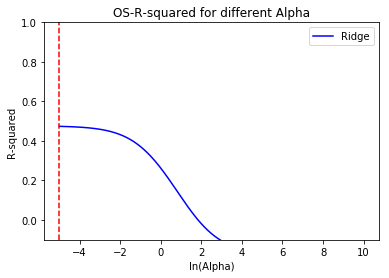

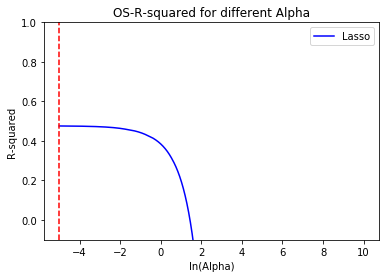

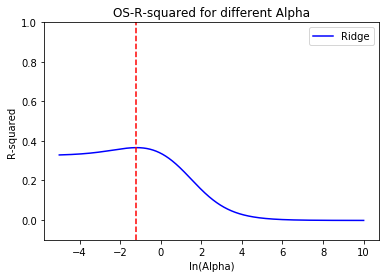

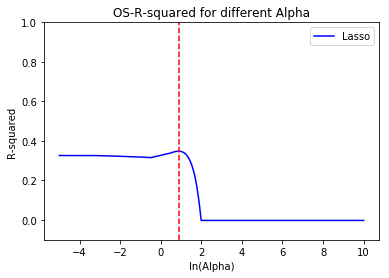

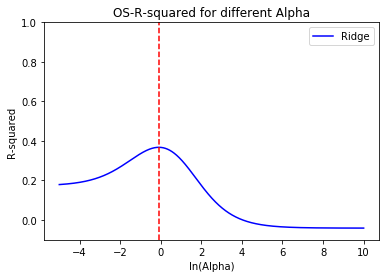

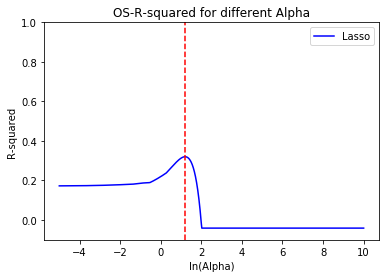

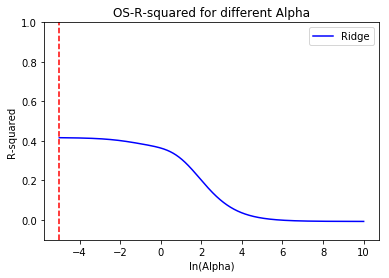

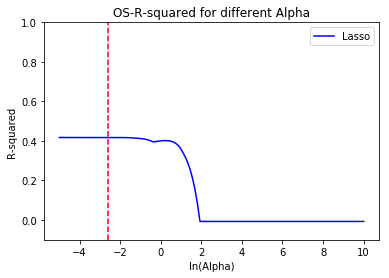

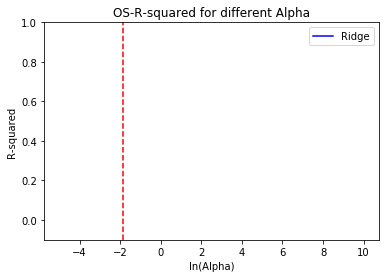

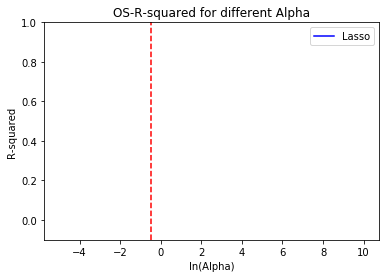

In [98]:

IS_4 = []
OS_4 = []
Ridge_best_4 = []
Lasso_best_4 = []

for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index,:], df.iloc[test_index, :]
    lm4 = smf.ols(formula = 'price_per_sqft ~  pop_race_div_idx + pop_mig_div_ind + cb_div + general_div + school_div + hospital_div + restaurant_div', data = df_train).fit()
    IS_4.append(lm4.rsquared)
    OS_4.append(r2_score(df_test.price_per_sqft,lm4.predict(df_test)))
    
    dataTrain = df_train[['price_per_sqft', 'pop_race_div_idx', 'pop_mig_div_ind', 'cb_div', 'general_div', 'school_div', 'hospital_div', 'restaurant_div']]
    dataTest = df_test[['price_per_sqft', 'pop_race_div_idx', 'pop_mig_div_ind', 'cb_div', 'general_div', 'school_div', 'hospital_div', 'restaurant_div']]

    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Ridge_best_4.append(best_R2)
    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Lasso_best_4.append(best_R2)


In [99]:
print(IS_4)
print(OS_4)

print(Ridge_best_4)
print(Lasso_best_4)

[0.45062463776138695, 0.5413214346864521, 0.5461497991836066, 0.5337944623546618, 0.4920094341202291]
[0.47644949521014046, 0.32617994473037526, 0.1724394418541525, 0.4173938195099989, -0.7394639062706745]
[0.47403449208534143, 0.3662433709006696, 0.36790122733423836, 0.41655095076790405, -0.6708808383838807]
[0.4758572023276223, 0.3482594069811321, 0.3203686787702674, 0.4178194393446816, -0.23655116434320722]


In [100]:
IS_5 = []
OS_5 = []


for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index,:], df.iloc[test_index, :]
    lm5 = smf.ols(formula = 'price_per_sqft ~  noise_count + park_count + cb_count * cb_div + general_count * general_div + school_count * school_div + hospital_count * hospital_div + restaurant_count * restaurant_div', data = df_train).fit()
    IS_5.append(lm5.rsquared)
    OS_5.append(r2_score(df_test.price_per_sqft,lm5.predict(df_test)))

print(IS_5)
print(OS_5)

[0.5566713536270551, 0.6285569250960481, 0.6306272349860087, 0.6284622152430888, 0.5926126045240243]
[0.6027787925419121, 0.46685705784200926, 0.3957569347384915, 0.5067108447939827, -0.3372953998902648]


In [101]:
IS_7 = []
OS_7 = []


for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index,:], df.iloc[test_index, :]
    lm7 = smf.ols(formula = 'price_per_sqft ~  bathrooms + numfloors + unitsres + yearbuilt + park_count + cb_count * cb_div + general_count * general_div + school_count * school_div + hospital_count * hospital_div + restaurant_count * restaurant_div', data = df_train).fit()
    IS_7.append(lm7.rsquared)
    OS_7.append(r2_score(df_test.price_per_sqft,lm7.predict(df_test)))

print(IS_7)
print(OS_7)


[0.6375152016061842, 0.708625673395175, 0.7278912721959393, 0.7120848317808948, 0.690410485664212]
[0.7311717996033413, 0.6390289370109966, 0.4386323153831523, 0.6218589224182327, -0.26473665441847727]


In [102]:
IS_6 = []
OS_6 = []


for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index,:], df.iloc[test_index, :]
    lm6 = smf.ols(formula = 'price_per_sqft ~  bathrooms + numfloors + unitsres + yearbuilt + pop_num + pop_race_white_pct + pop_foreign_pct + pop_pov_pct + hh_inc_med + park_count + cb_count * cb_div + general_count * general_div + school_count * school_div + hospital_count * hospital_div + restaurant_count * restaurant_div', data = df).fit()
    IS_6.append(lm6.rsquared)
    OS_6.append(r2_score(df_test.price_per_sqft,lm6.predict(df_test)))

print(IS_6)
print(OS_6)



[0.7159330522981073, 0.7159330522981073, 0.7159330522981073, 0.7159330522981073, 0.7159330522981073]
[0.7715934783364649, 0.6613567500107678, 0.5341796428486464, 0.6873705171328323, -0.17083822632647028]


                            OLS Regression Results                            
Dep. Variable:         price_per_sqft   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     1244.
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:47:57   Log-Likelihood:                -36171.
No. Observations:                4834   AIC:                         7.235e+04
Df Residuals:                    4829   BIC:                         7.238e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         599.3241     67.311     

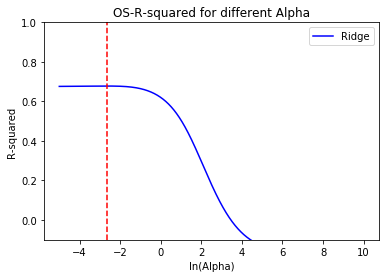

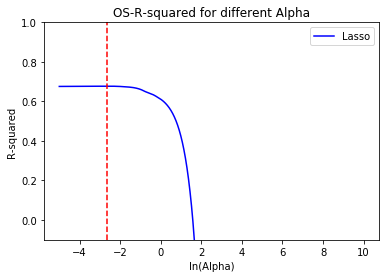

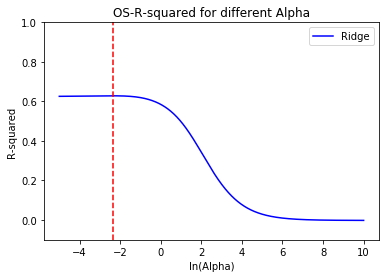

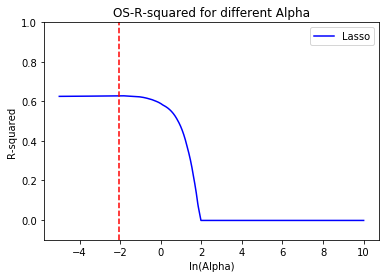

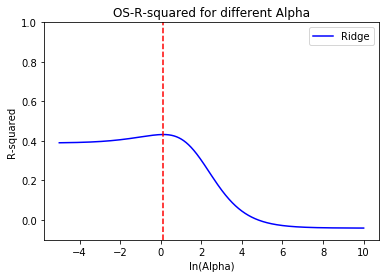

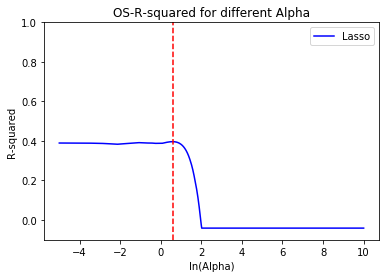

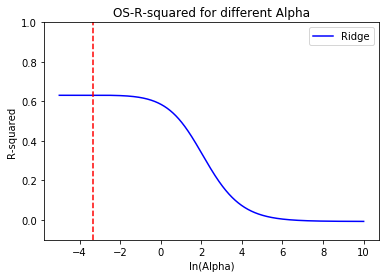

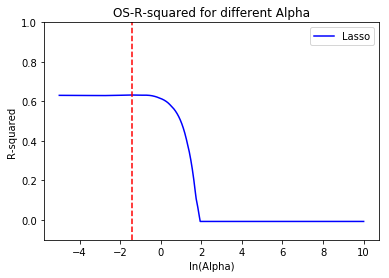

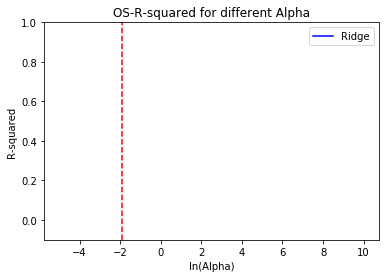

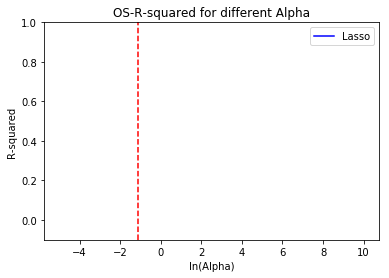

In [103]:
IS_8 = []
OS_8 = []
Ridge_best_8 = []
Lasso_best_8 = []

for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index,:], df.iloc[test_index, :]
    lm8 = smf.ols(formula = 'price_per_sqft ~  bathrooms + numfloors + unitsres + yearbuilt  + pop_foreign_pct + pop_pov_pct + pop_edu_collp_pct + hh_inc_med + cb_count + general_count + school_count + linknyc_count', data = df_train).fit()
    IS_8.append(lm8.rsquared)
    OS_8.append(r2_score(df_test.price_per_sqft,lm8.predict(df_test)))
    
    dataTrain = df_train[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt','pop_foreign_pct','pop_pov_pct','pop_edu_collp_pct','hh_inc_med','cb_count','general_count','school_count','linknyc_count']]
    dataTest = df_test[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt','pop_foreign_pct','pop_pov_pct','pop_edu_collp_pct','hh_inc_med','cb_count','general_count','school_count','linknyc_count']]

    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Ridge_best_8.append(best_R2)
    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Lasso_best_8.append(best_R2)

In [104]:
print(IS_8)
print(OS_8)

print(Ridge_best_8)
print(Lasso_best_8)


[0.6262565517527424, 0.6823549770910797, 0.708072635220345, 0.6798707371125026, 0.6642302216657492]
[0.6756026105999633, 0.6252722758096096, 0.3896678897387935, 0.6308776874900159, -0.3100330412170227]
[0.6778168791380569, 0.6283925943848097, 0.4326315157216082, 0.6313239357887712, -0.2689777672242146]
[0.6770600222503695, 0.6288031609277068, 0.3964888361197446, 0.632451858870198, -0.19524143357347667]


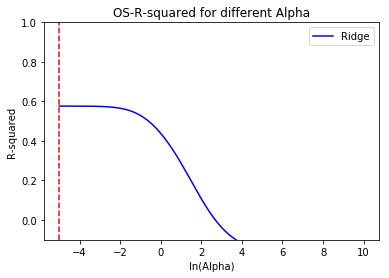

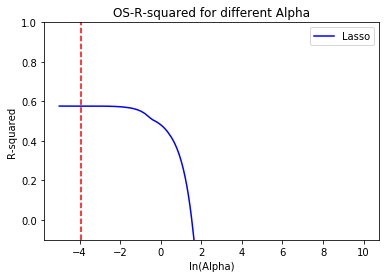

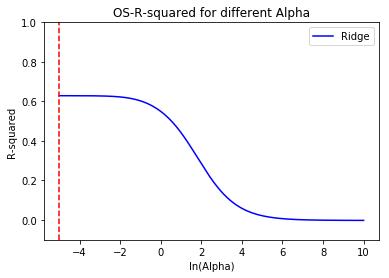

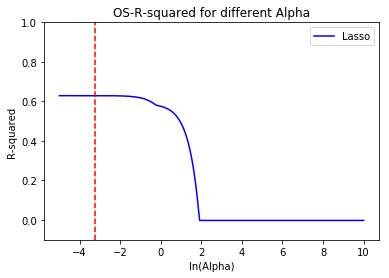

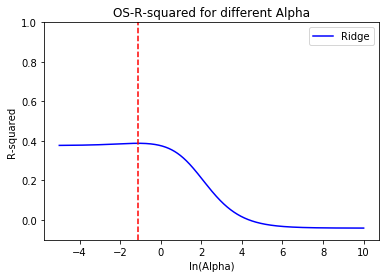

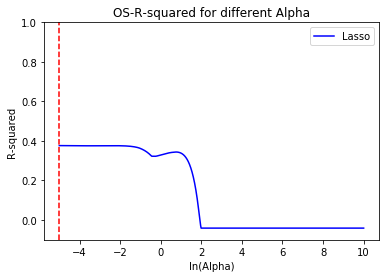

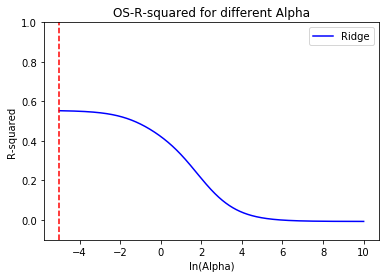

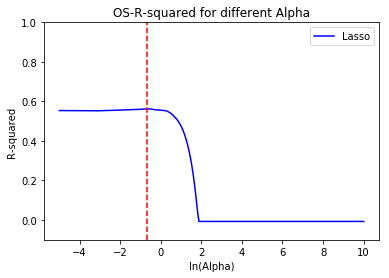

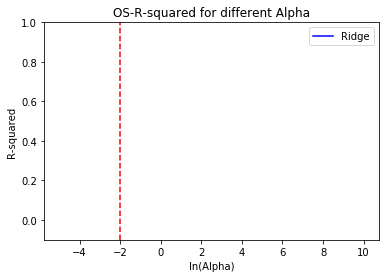

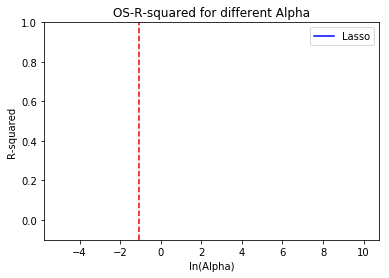

[0.5828482502209145, 0.6086623013444368, 0.6398755947998858, 0.6187112690469022, 0.6049586952969512]
[0.5763951957720506, 0.6290316388780612, 0.3769192500958577, 0.5546813160417625, -0.8466185113756863]
[0.5764092670099794, 0.6290145019706219, 0.38820557020432045, 0.5530339212014089, -0.6901668479965797]
[0.5764937169931166, 0.6292003790275087, 0.3765756591435575, 0.5623510064485939, -0.6954292299574232]


In [105]:
IS_9 = []
OS_9 = []
Ridge_best_9 = []
Lasso_best_9 = []

for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index,:], df.iloc[test_index, :]
    lm9 = smf.ols(formula = 'price_per_sqft ~  bathrooms + numfloors + unitsres + yearbuilt + pop_race_white_pct + pop_foreign_pct + pop_pov_pct + pop_edu_collp_pct + hh_inc_med', data = df_train).fit()
    IS_9.append(lm9.rsquared)
    OS_9.append(r2_score(df_test.price_per_sqft,lm9.predict(df_test)))


    dataTrain = df_train[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt', 'pop_race_white_pct','pop_foreign_pct','pop_pov_pct','pop_edu_collp_pct','hh_inc_med']]
    dataTest = df_test[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt','pop_race_white_pct','pop_foreign_pct','pop_pov_pct','pop_edu_collp_pct','hh_inc_med']]

    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Ridge_best_9.append(best_R2)
    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Lasso_best_9.append(best_R2)

print(IS_9)
print(OS_9)

print(Ridge_best_9)
print(Lasso_best_9)

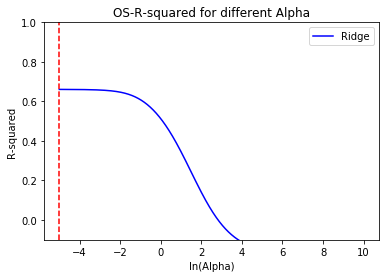

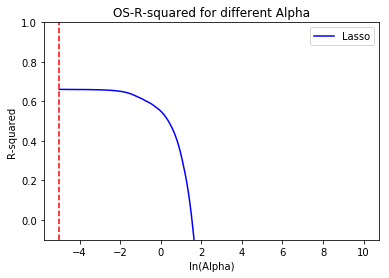

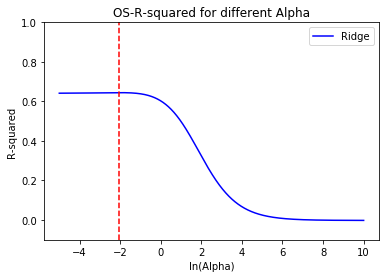

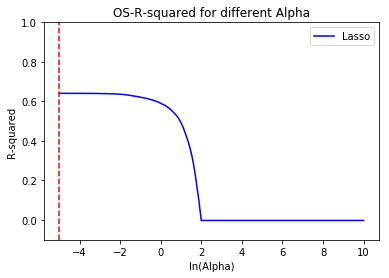

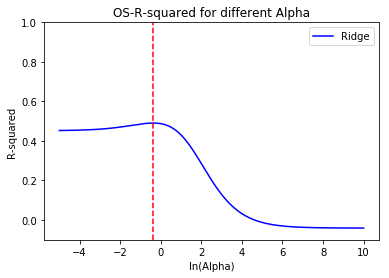

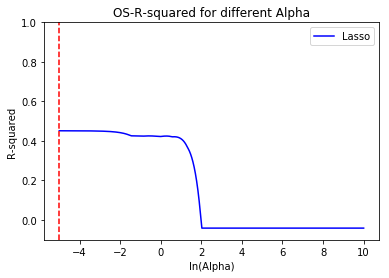

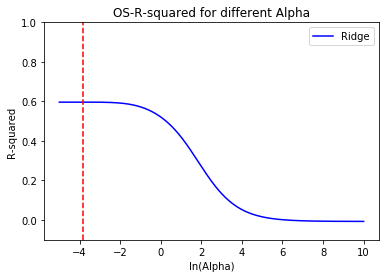

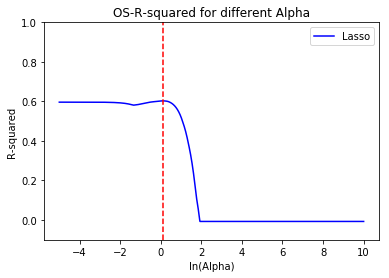

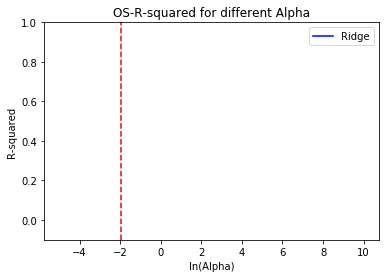

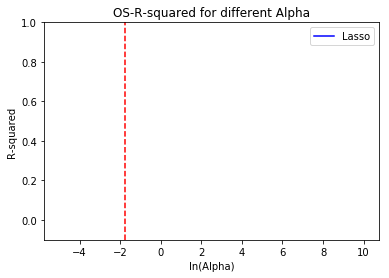

[0.6308315665528459, 0.677719509695013, 0.6997824397592516, 0.6874195275023618, 0.6628713620025404]
[0.6611211625968636, 0.6412452777236468, 0.45166820546823583, 0.5962296737961355, -0.27809295141859547]
[0.6608457175864371, 0.6444402173532315, 0.49076869645377763, 0.5965376361835629, -0.21646704971310538]
[0.6608818165109216, 0.6411385176775604, 0.45155546916399525, 0.6029012823183136, -0.20306235946100837]


In [106]:
IS_10 = []
OS_10 = []
Ridge_best_10 = []
Lasso_best_10 = []

for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index,:], df.iloc[test_index, :]
    lm10 = smf.ols(formula = 'price_per_sqft ~  bathrooms + numfloors + unitsres + yearbuilt + pop_race_white_pct + pop_foreign_pct + pop_pov_pct+ hh_inc_med + cb_div + general_div + restaurant_div', data = df_train).fit()
    IS_10.append(lm10.rsquared)
    OS_10.append(r2_score(df_test.price_per_sqft,lm10.predict(df_test)))
    dataTrain = df_train[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt', 'pop_race_white_pct','pop_foreign_pct','pop_pov_pct','hh_inc_med', 'cb_div', 'general_div', 'restaurant_div']]
    dataTest = df_test[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt','pop_race_white_pct','pop_foreign_pct','pop_pov_pct','hh_inc_med', 'cb_div', 'general_div', 'restaurant_div']]

    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Ridge_best_10.append(best_R2)
    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Lasso_best_10.append(best_R2)
    
print(IS_10)
print(OS_10)

print(Ridge_best_10)
print(Lasso_best_10)

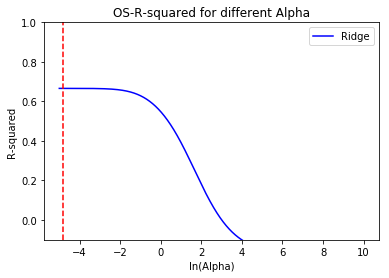

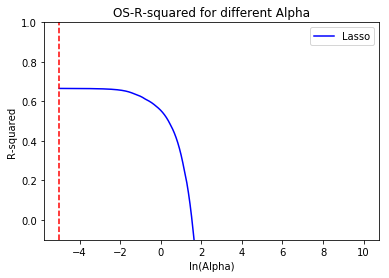

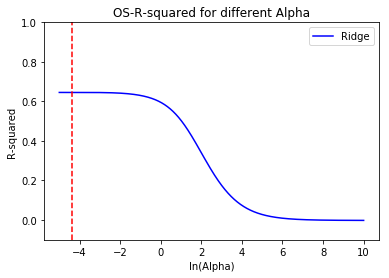

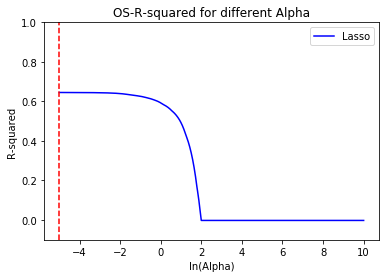

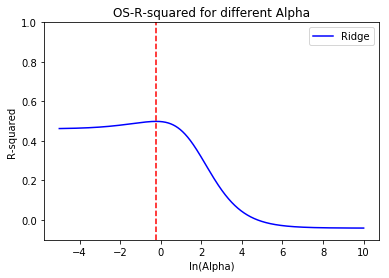

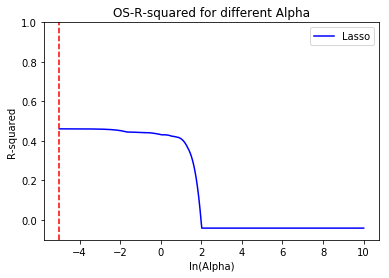

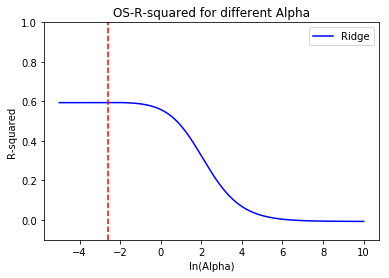

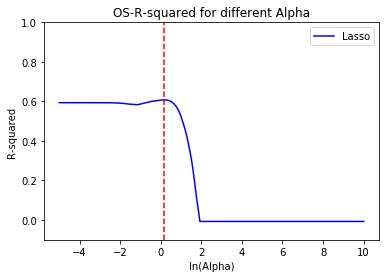

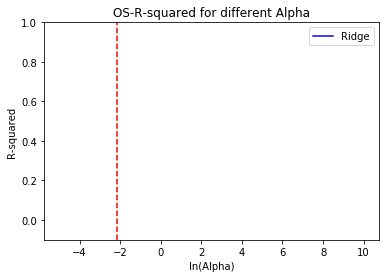

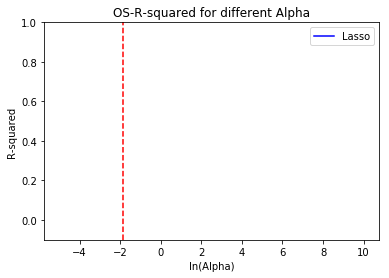

[0.6326075821737797, 0.6806339999814222, 0.7015023279407747, 0.6918108004931371, 0.666323286101213]
[0.6659232307950194, 0.6517523702732517, 0.48275921285733525, 0.6682040571418815, -0.15682805751544326]
[0.6659774005312901, 0.6454903790984725, 0.4990353770414794, 0.5949048277297315, -0.2748905685227836]
[0.6657410263862109, 0.6452633727155875, 0.46127761410881885, 0.6078677805492501, -0.23914264250748807]


In [110]:
IS_11 = []
OS_11 = []
Ridge_best_11 = []
Lasso_best_11 = []

for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index,:], df.iloc[test_index, :]
    lm11 = smf.ols(formula = 'price_per_sqft ~  bathrooms + numfloors + unitsres + yearbuilt + pop_race_white_pct + pop_foreign_pct + pop_pov_pct+ hh_inc_med + cb_div + general_div + restaurant_div + duration_to_ctr_avg', data = df_train).fit()
    IS_11.append(lm11.rsquared)
    OS_11.append(r2_score(df_test.price_per_sqft,lm10.predict(df_test)))
    dataTrain = df_train[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt', 'pop_race_white_pct','pop_foreign_pct','pop_pov_pct','hh_inc_med', 'cb_div', 'general_div', 'restaurant_div', 'duration_to_ctr_avg']]
    dataTest = df_test[['price_per_sqft','bathrooms','numfloors','unitsres','yearbuilt','pop_race_white_pct','pop_foreign_pct','pop_pov_pct','hh_inc_med', 'cb_div', 'general_div', 'restaurant_div', 'duration_to_ctr_avg']]

    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Ridge_best_11.append(best_R2)
    alphas = np.exp(np.linspace(-5,10,10000)) #exponential range of possible alphas
    [alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataTrain.iloc[:,1:],dataTrain.price_per_sqft,dataTest.iloc[:,1:],dataTest.price_per_sqft,alphas,Graph=True,logl=True)
    Lasso_best_11.append(best_R2)
    
print(IS_11)
print(OS_11)

print(Ridge_best_11)
print(Lasso_best_11)

In [56]:
df['pop_mig_div_ind'] = df['pop_mig_div_ind'].astype(float)
df_tree = df.drop(columns=['price','clean', 'geoid', 'area', 'postal_code','pop_65p_pct', 'pop_18_64_pct','pop_race_white_pct','pop_bornstate_pct',
                           'pop_edu_nohs_pct','pop_edu_hs_pct', 'pop_edu_somecoll_pct', 'pop_edu_associates_pct',
                           'pop_edu_coll_pct', u'pop_edu_grad_pct', 'crime_prop_num', 'crime_viol_num', 'crime_all_num',
                            'crime_prop_rt', 'crime_viol_rt','pop_born_outstate_pct'])

In [137]:
high = df_tree.price_per_sqft.quantile(.8)
df_tree['price_label'] = ''

for i in range(0, len(df_tree)):
    
    if df_tree.iloc[i, 0] >= high:
        df_tree.price_label[i] = "high"
    else:
        df_tree.price_label[i] = "normal"
        

/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [138]:
df_tree.head()
len(df_tree)

4834

In [139]:
y=df_tree.iloc[:,-1]

# Get the feature space.  We are using only features from before the stop, getting rid of features from during/after the stop like "arrested".
X=df_tree.iloc[:,1:-2]
X=pd.get_dummies(X)
X.head()

#X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=999)

,beds,bathrooms,lat,lon,schooldist,numfloors,unitsres,unitstotal,residfar,yearbuilt,...,borough_MN,borough_QN,borough_SI,type_2 to 4 family,type_5 family,type_condo,type_coop,type_mix,type_other,type_single family
0,2,3.0,40.747050,-73.989525,2.0,24.0,3025.0,3027.0,10.00,2016.0,...,1,0,0,0,0,0,0,0,1,0
1,1,1.0,40.746380,-73.996758,2.0,12.0,0.0,0.0,6.02,2014.0,...,1,0,0,0,0,1,0,0,0,0
2,2,3.0,40.754624,-74.002313,2.0,71.0,137.0,140.0,10.00,2015.0,...,1,0,0,0,1,0,0,0,0,0
3,2,2.0,40.749810,-73.994784,2.0,12.0,29.0,30.0,9.00,1986.0,...,1,0,0,0,0,0,0,0,1,0
4,3,4.0,40.754624,-74.002313,2.0,71.0,137.0,140.0,10.00,2015.0,...,1,0,0,0,1,0,0,0,0,0


In [140]:
## Split data into 60% train, 40% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=999)

In [141]:
from sklearn.tree import DecisionTreeClassifier

# learn model
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

# in sample accuracy
print 'In sample accuracy:',dt.score(X_train,y_train)

# out of sample accuracy
print 'Out of sample accuracy:',dt.score(X_test,y_test)

In sample accuracy: 1.0
Out of sample accuracy: 0.9979317476732161


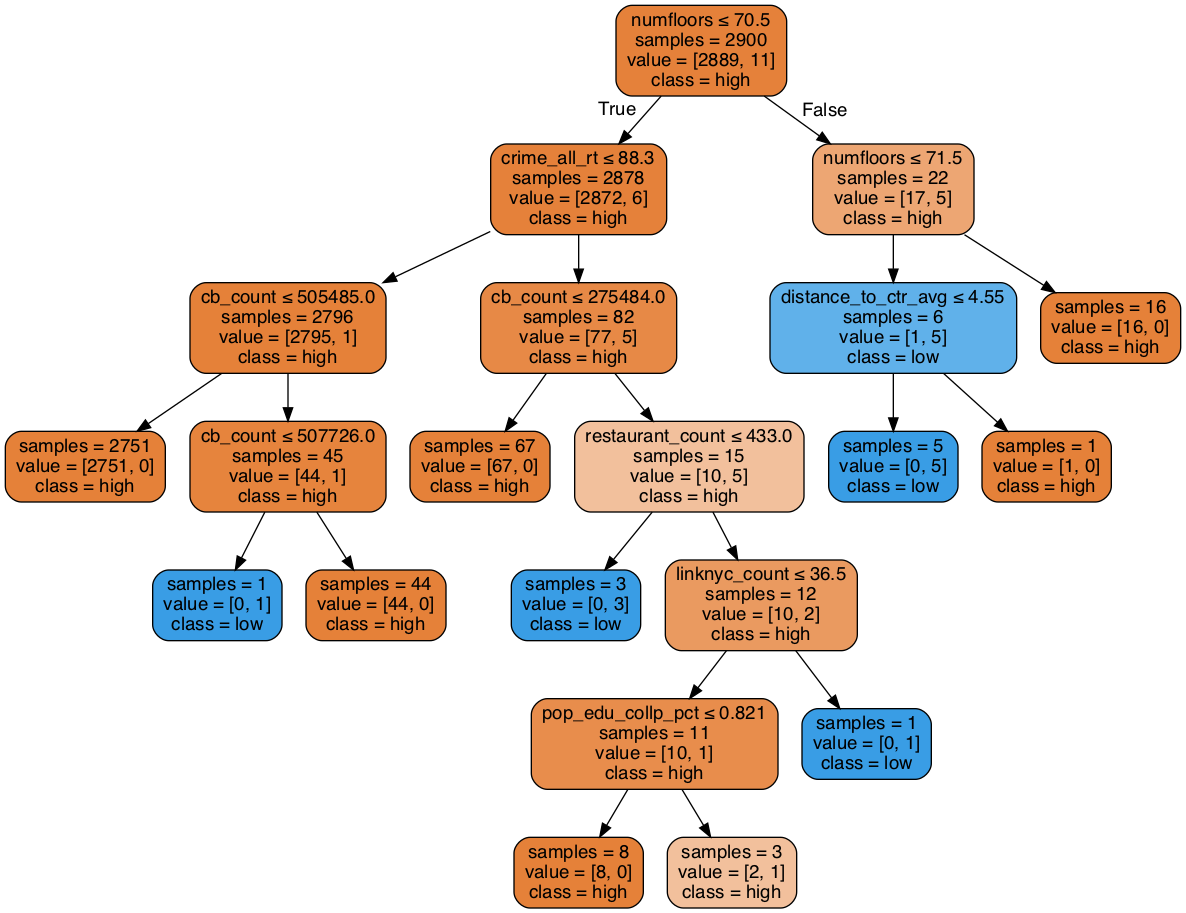

In [145]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=6) # just to keep it simple for visualization

from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['low', 'high'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [147]:
X_train_div = X_train[['pop_race_div_idx','pop_mig_div_ind', 'cb_div', 'general_div', 'school_div', 'hospital_div', 'restaurant_div']]
X_test_div = X_test[['pop_race_div_idx','pop_mig_div_ind', 'cb_div', 'general_div', 'school_div', 'hospital_div', 'restaurant_div']]

In [148]:
dt_div=DecisionTreeClassifier()
dt_div.fit(X_train_div,y_train)

# in sample accuracy
print 'In sample accuracy:',dt_div.score(X_train_div,y_train)

# out of sample accuracy
print 'Out of sample accuracy:',dt_div.score(X_test_div,y_test)

In sample accuracy: 0.9993103448275862
Out of sample accuracy: 0.9958634953464323


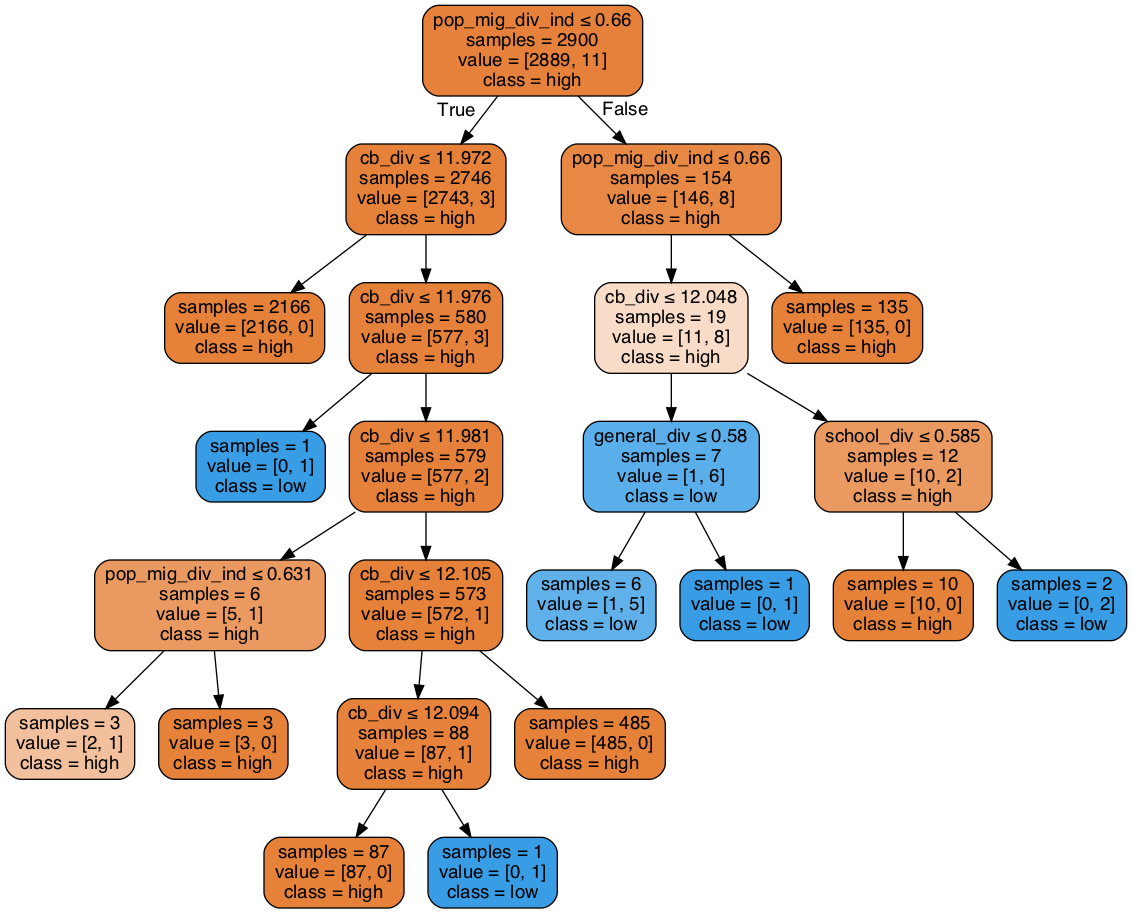

In [151]:
dt_div = DecisionTreeClassifier(max_depth=6) # just to keep it simple for visualization
dt_div.fit(X_train_div,y_train)
thestring = tree.export_graphviz(dt_div, out_file=None,  
                         feature_names=X_train_div.columns.values, 
                         class_names=['low', 'high'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [63]:
high = df_tree.price_per_sqft.quantile(.8)
df_tree['price_label'] = ''

for i in range(0, len(df_tree)):
    
    if df_tree.iloc[i, 0] >= high:
        df_tree.price_label[i] = "high"
    else:
        df_tree.price_label[i] = "normal"
        

y=df_tree.iloc[:,-1]

# Get the feature space.  We are using only features from before the stop, getting rid of features from during/after the stop like "arrested".
X=df_tree.iloc[:,1:-2]
X=pd.get_dummies(X)
X.head()

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=999)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(n_estimators=10, n_jobs=-1,max_leaf_nodes=10)
rf.fit(X_train, y_train)
pred_=rf.predict_proba(X_train)[:,1]
pred=rf.predict_proba(X_test)[:,1]
print roc_auc_score(y_train,pred_)
print roc_auc_score(y_test,pred)

/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0.999937065357626
0.9852255054432347


[0.6997407983411094, 0.9721099015033696, 0.9970969414204252, 0.9628823224468638, 0.8568170036288232, 0.9862623120787973, 0.993675479523069, 0.9917055469155003, 0.9896837739761534, 0.9783307413167445]


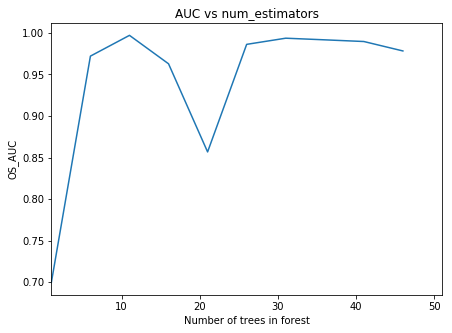

In [61]:
AUC=[]
for i in range(1,51,5):
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1,max_leaf_nodes=10)
    rf.fit(X_train, y_train)
    pred=rf.predict_proba(X_test)[:,1]
    AUC.append(roc_auc_score(np.array(y_test),pred))
print AUC

plt.figure(figsize=(7,5))
plt.plot(range(1,51,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,51)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

df_pca = 